# Pandas library

In [1]:
import pandas as pd
import numpy as np

## DataFrame

Series - 1D dataframe

DataFrame - 2D dataframe

In [2]:
df = pd.Series([30, 35, 40],
               index=['2015 Sales', '2016 Sales', '2017 Sales'],
               name='Product A')
df

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

In [3]:
df = pd.DataFrame(
    {'Bob': ['I liked it', 'It was awful'],
     'Sue': ['Pretty good', 'Blank']},
    index=['Product A', 'Product B']
)
df

,Bob,Sue
Product A,I liked it,Pretty good
Product B,It was awful,Blank


In [4]:
numpy_array = pd.Series([1, 2, 3]).values

In [5]:
numpy_array != 2

array([ True, False,  True])

In [6]:
numpy_array[numpy_array != 2]

array([1, 3])

### Create dataframe from csv

In [7]:
df = pd.read_csv('data/wine.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
df = pd.read_csv('data/wine.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [9]:
df = pd.read_csv('data/wine.csv')
df.set_index('Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Data access

In [10]:
def read_data():
    return pd.read_csv('data/wine.csv', index_col=0)

In [11]:
df = read_data()

In [12]:
df.country

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [13]:
df.country[0]

'US'

In [14]:
df['country']

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [15]:
df['country'][0]

'US'

### Select subsets

When selecting a subset of muliple columns, it is faster to first take the subset and then the columns we want

If we only want a subset of one column, it is faster to first retrieve the column and then take a subset.

In [16]:
%%time
df[['country', 'province']][:5]

CPU times: user 4.27 ms, sys: 191 µs, total: 4.46 ms
Wall time: 3.85 ms


,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence


In [17]:
%%time
df[:5][['country', 'province']]

CPU times: user 741 µs, sys: 154 µs, total: 895 µs
Wall time: 880 µs


,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence


In [18]:
%%time
df['country'][:5]

CPU times: user 249 µs, sys: 52 µs, total: 301 µs
Wall time: 304 µs


0        US
1     Spain
2        US
3        US
4    France
Name: country, dtype: object

In [19]:
%%time
df[:5]['country']

CPU times: user 387 µs, sys: 22 µs, total: 409 µs
Wall time: 396 µs


0        US
1     Spain
2        US
3        US
4    France
Name: country, dtype: object

#### iloc

select data based on its numerical position in the data (row first, column second)

iloc is exclusive so 0:1000 returns 1000 entries

In [20]:
df.iloc[0]

country                                                       US
description    This tremendous 100% varietal wine hails from ...
designation                                    Martha's Vineyard
points                                                        96
price                                                        235
province                                              California
region_1                                             Napa Valley
region_2                                                    Napa
variety                                       Cabernet Sauvignon
winery                                                     Heitz
Name: 0, dtype: object

In [21]:
df.iloc[:, 0]

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [22]:
df.iloc[[0, 1, 2], 0]

0       US
1    Spain
2       US
Name: country, dtype: object

#### loc

label based selection

loc is inclusive so 0:1000 returns 1001 entries

In [23]:
df.loc[:, ['country', 'province']]

,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence
...,...,...
150925,Italy,Southern Italy
150926,France,Champagne
150927,Italy,Southern Italy
150928,France,Champagne


#### Conditional selection

In [24]:
condition = df.country == 'Italy'
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia


In [25]:
italy_condition = df.country == 'Italy'
points_gt90_condition = df.points >= 90

df.loc[italy_condition & points_gt90_condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia


In [26]:
condition = (df.country == 'Italy') | (df.points >= 90)
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [27]:
condition = df.country.isin(['Italy', 'France'])
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga


### Data types

* object: str or mixed for text or numeric and non numeric values
* int64: integer numbers
* float64: floating point numbers
* bool: True/False values
* datetime64: date and time values
* timedelta: difference between two datetimes
* category: finite list of text values

In [28]:
df = pd.DataFrame({
    'str column': ['text 1', 'text 2'],
    'integer column': [42, 32],
    'boolean column': [True, False],
    'float column': [12.0, 35.0],
    'date time column': ['2017-03-22 15:16:45', '2020-03-22 09:16:45'],
    'epoch seconds column': [0, 5],
    'category column':  ['category_a', 'category_b']
})
df.head()

,str column,integer column,boolean column,float column,date time column,epoch seconds column,category column
0,text 1,42,True,12.0,2017-03-22 15:16:45,0,category_a
1,text 2,32,False,35.0,2020-03-22 09:16:45,5,category_b


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   str column            2 non-null      object 
 1   integer column        2 non-null      int64  
 2   boolean column        2 non-null      bool   
 3   float column          2 non-null      float64
 4   date time column      2 non-null      object 
 5   epoch seconds column  2 non-null      int64  
 6   category column       2 non-null      object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 226.0+ bytes


In [30]:
df['date time column'] = df['date time column'].astype('datetime64')
df['category column'] = df['category column'].astype('category')
df['epoch seconds column'] = pd.to_datetime(df['epoch seconds column'], unit='s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   str column            2 non-null      object        
 1   integer column        2 non-null      int64         
 2   boolean column        2 non-null      bool          
 3   float column          2 non-null      float64       
 4   date time column      2 non-null      datetime64[ns]
 5   epoch seconds column  2 non-null      datetime64[ns]
 6   category column       2 non-null      category      
dtypes: bool(1), category(1), datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 308.0+ bytes


In [31]:
df.head()

,str column,integer column,boolean column,float column,date time column,epoch seconds column,category column
0,text 1,42,True,12.0,2017-03-22 15:16:45,1970-01-01 00:00:00,category_a
1,text 2,32,False,35.0,2020-03-22 09:16:45,1970-01-01 00:00:05,category_b


In [32]:
df.dtypes

str column                      object
integer column                   int64
boolean column                    bool
float column                   float64
date time column        datetime64[ns]
epoch seconds column    datetime64[ns]
category column               category
dtype: object

In [33]:
df['year'] = df['date time column'].dt.year
df['month'] = df['date time column'].dt.month
df['day'] = df['date time column'].dt.day
df['weekday'] = df['date time column'].dt.weekday # 0 is Monday, 6 is Sunday
df['hours'] = df['date time column'].dt.hour
df['minutes'] = df['date time column'].dt.minute
df['seconds'] = df['date time column'].dt.second
df.head()

,str column,integer column,boolean column,float column,date time column,epoch seconds column,category column,year,month,day,weekday,hours,minutes,seconds
0,text 1,42,True,12.0,2017-03-22 15:16:45,1970-01-01 00:00:00,category_a,2017,3,22,2,15,16,45
1,text 2,32,False,35.0,2020-03-22 09:16:45,1970-01-01 00:00:05,category_b,2020,3,22,6,9,16,45


In [34]:
df.dtypes

str column                      object
integer column                   int64
boolean column                    bool
float column                   float64
date time column        datetime64[ns]
epoch seconds column    datetime64[ns]
category column               category
year                             int64
month                            int64
day                              int64
weekday                          int64
hours                            int64
minutes                          int64
seconds                          int64
dtype: object

In [35]:
def get_column_by_types(dataframe):
    return {
        "numerical": list(dataframe.select_dtypes(include=['int64', 'float64']).columns),
        "bool": list(dataframe.select_dtypes(include=["bool"]).columns),
        "object": list(dataframe.select_dtypes(include=['object']).columns),
        "datetime": list(dataframe.select_dtypes(include=["datetime64"]).columns),
        "category": list(dataframe.select_dtypes(include=["category"]).columns)
    }


In [36]:
import pprint

col_type_dict = get_column_by_types(df)
pprint.pprint(col_type_dict)

{'bool': ['boolean column'],
 'category': ['category column'],
 'datetime': ['date time column', 'epoch seconds column'],
 'numerical': ['integer column',
               'float column',
               'year',
               'month',
               'day',
               'weekday',
               'hours',
               'minutes',
               'seconds'],
 'object': ['str column']}


## Timestamps

In [37]:
df = pd.read_csv('data/popularity-contest.tsv', sep=' ')
df.columns= ['atime', 'ctime', 'package-name', 'mru-program', 'tag']
df.head()

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN
1,1387295796,1354370480,login,/bin/su,NaN
2,1387295743,1354341275,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,1387295743,1387224204,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,1387295742,1354341253,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   atime         2898 non-null   object
 1   ctime         2898 non-null   object
 2   package-name  2897 non-null   object
 3   mru-program   2897 non-null   object
 4   tag           1124 non-null   object
dtypes: object(5)
memory usage: 113.3+ KB


In [39]:
drop_condition_atime = (df.atime == '0') | (df.atime == 'END-POPULARITY-CONTEST-0')
df = df.drop(df[drop_condition_atime].index)

In [40]:
df.atime = df.atime.astype('int64')
df.ctime = df.ctime.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   atime         2098 non-null   int64 
 1   ctime         2098 non-null   int64 
 2   package-name  2098 non-null   object
 3   mru-program   2098 non-null   object
 4   tag           1124 non-null   object
dtypes: int64(2), object(3)
memory usage: 98.3+ KB


In [41]:
df[:1]

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN


In [42]:
df.atime = pd.to_datetime(df.atime, unit='s')
df.ctime = pd.to_datetime(df.ctime, unit='s')
df[:1]

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN


### Summary functions

In [43]:
df = read_data()

In [44]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


describe() function will show statistics about the numerical values in the dataframe when applied on the dataframe

We can get other columns by specifying them

In [45]:
df.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [46]:
df.country.describe()

count     150925
unique        48
top           US
freq       62397
Name: country, dtype: object

In [47]:
df.points.mean()

87.8884184721394

In [48]:
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [49]:
country_counnts = df.country.value_counts().head()
country_counnts

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

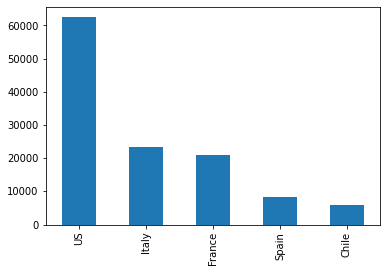

In [50]:
country_counnts.plot(kind='bar')

### Change or create data

In [51]:
df = read_data()
df['description'] = 'no description'
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,no description,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,no description,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,no description,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,no description,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,no description,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [52]:
df = read_data()
df['index_backwards'] = range(len(df), 0, -1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,index_backwards
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,150930
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,150929
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,150928
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,150927
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,150926


#### Map and apply function

map() function that takes one set of values and maps them to another set of values

The function in map expects a single argument as input and returns a single output, this function is apply element wise in the dataframe and map returns a Series with all the values from function

apply() function is the equivalent of map if we want to transform a whole DataFrame with a function on each row

The argument axis can have two values

* index: the function needs to apply transformation to a column
* columns: the function needs to apply transformation to a row

Pandas has built in functions for all Python operators: >, <, ==, ... which are much faster. Builtins also works with concatenation of string

In [53]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [54]:
points_mean = df.points.mean()

remean_points = lambda p: p - points_mean

In [55]:
%%time
df['points_with_map'] = df.points.map(remean_points)
df.head()

CPU times: user 102 ms, sys: 0 ns, total: 102 ms
Wall time: 102 ms


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_with_map
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,8.111582
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,8.111582
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8.111582
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,8.111582
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,7.111582


In [56]:
%%time
df['points_with_builtin'] = df.points - points_mean
df.head()

CPU times: user 3.96 ms, sys: 0 ns, total: 3.96 ms
Wall time: 3.48 ms


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_with_map,points_with_builtin
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,8.111582,8.111582
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,8.111582,8.111582
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8.111582,8.111582
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,8.111582,8.111582
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,7.111582,7.111582


In [57]:
df['points_equality'] = df.points_with_map == df.points_with_builtin
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_with_map,points_with_builtin,points_equality
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,8.111582,8.111582,True
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,8.111582,8.111582,True
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8.111582,8.111582,True
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,8.111582,8.111582,True
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,7.111582,7.111582,True


In [58]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [59]:
points_price = lambda row: row.points * row.price 

In [60]:
%%time
df['points_price'] = df.apply(points_price, axis='columns')
df.head()

CPU times: user 5.69 s, sys: 21.2 ms, total: 5.71 s
Wall time: 5.73 s


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,22560.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,10560.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8640.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,6240.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,6270.0


In [61]:
%%time
df['points_price_builin'] = df.points * df.price
df.head()

CPU times: user 4.07 ms, sys: 0 ns, total: 4.07 ms
Wall time: 3.03 ms


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price,points_price_builin
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,22560.0,22560.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,10560.0,10560.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8640.0,8640.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,6240.0,6240.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,6270.0,6270.0


In [62]:
df['country_province'] = df.country + "_" + df.province
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price,points_price_builin,country_province
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,22560.0,22560.0,US_California
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,10560.0,10560.0,Spain_Northern Spain
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8640.0,8640.0,US_California
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,6240.0,6240.0,US_Oregon
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,6270.0,6270.0,France_Provence


### Missing data



#### Check if there is missing data

In [63]:
df = pd.read_csv('data/kickstarter.csv')
df.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

#### Find all rows with missing data

In [64]:
df = pd.read_csv('data/kickstarter.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [65]:
nan_rows = df[df.isnull().T.any().T]
nan_rows

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04
378434,9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2000.0,2015-09-21 22:33:18,2125.00,undefined,0,"N,0""",NaN,3273.36,3080.81


#### Get NaN in specific column 

In [66]:
df = read_data()

In [67]:
condition = df.price.isnull()
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita


In [68]:
condition = df.price.notnull()
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [69]:
df[pd.isnull(df.country)].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


#### Replace missing data

In [70]:
df.country = df.country.fillna('Unknown')
df[df.country == 'Unknown'].country.count()

5

In [71]:
df.country = df.country.replace('Unknown', 'Missing country')
print(f'Country as Unknown: {df[df.country == "Unknown"].country.count()}')
print(f'Country as Missing Country: {df[df.country == "Missing country"].country.count()}')

Country as Unknown: 0
Country as Missing Country: 5


### Grouping

groupby(): exist with single value or list of values

Selecting multiple values result in a multi index which can be removed with reset_index() function

In [72]:
df = read_data()

In [73]:
df.groupby('points').points.count()[:5]

points
80      898
81     1502
82     4041
83     6048
84    10708
Name: points, dtype: int64

In [74]:
df.groupby('points').price.min()[:5]

points
80    5.0
81    5.0
82    5.0
83    4.0
84    4.0
Name: price, dtype: float64

In [75]:
df.groupby(['country', 'province']).apply(lambda x: x.loc[x.points.idxmax()])

country  \
country   province                      
Albania   Mirditë             Albania   
Argentina Mendoza Province  Argentina   
          Other             Argentina   
Australia Australia Other   Australia   
          New South Wales   Australia   
...                               ...   
Uruguay   Juanico             Uruguay   
          Montevideo          Uruguay   
          Progreso            Uruguay   
          San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Albania   Mirditë           This garnet-colored wine made from 100% Kallme...   
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
Australia Australia Other   This big wine presents a sophisticated bouquet...   
          New South Wales   This wine's deep brassy color suggests honey, ...   
...                                                                       ...   
Uruguay   Juanico           This mature Bordeaux-style blend is earthy on ...   
          Montevideo        Bouza ranks as one of Uruguay's top wineries, ...   
          Progreso          Blackberry and plum aromas come with wood-smok...   
          San Jose          While this ranks as one of the best Uruguayan ...   
          Uruguay           They call it Special Barrel, and one sniff tel...   

                                                        designation  points  \
country   province                                                            
Albania   Mirditë                                               NaN      88   
Argentina Mendoza Province                         Nicasia Vineyard      97   
          Other                                             Reserva      95   
Australia Australia Other                                  Yattarna      92   
          New South Wales                        Noble One Botrytis      93   
...                                                             ...     ...   
Uruguay   Juanico                  Preludio Barrel Select Lote N 77      90   
          Montevideo        Monte Vide Eu Tannat-Merlot-Tempranillo      90   
          Progreso                                              RPF      89   
          San Jose                 El Preciado Premier Gran Reserva      89   
          Uruguay                                    Special Barrel      89   

                            price          province                 region_1  \
country   province                                                             
Albania   Mirditë            20.0           Mirditë                      NaN   
Argentina Mendoza Province  120.0  Mendoza Province                  Mendoza   
          Other              90.0             Other                    Salta   
Australia Australia Other    65.0   Australia Other  South Eastern Australia   
          New South Wales    32.0   New South Wales          New South Wales   
...                           ...               ...                      ...   
Uruguay   Juanico            45.0           Juanico                      NaN   
          Montevideo         57.0        Montevideo                      NaN   
          Progreso           23.0          Progreso                      NaN   
          San Jose           60.0          San Jose                      NaN   
          Uruguay            50.0           Uruguay                      NaN   

                           region_2     variety                winery  
country   province                                                     
Albania   Mirditë               NaN     Kallmet                Arbëri  
Argentina Mendoza Province      NaN      Malbec  Bodega Catena Zapata  
          Other                 NaN      Malbec                Colomé  
Australia Aus

In [76]:
df.groupby('country').price.agg([len, min, max])[:5]

,len,min,max
country,,,
Albania,2.0,20.0,20.0
Argentina,5631.0,4.0,250.0
Australia,4957.0,5.0,850.0
Austria,3057.0,8.0,1100.0
Bosnia and Herzegovina,4.0,12.0,13.0


In [77]:
tmp = df.groupby(['country', 'province']).description.agg([len])
tmp[:5]

len
country   province              
Albania   Mirditë              2
Argentina Mendoza Province  4742
          Other              889
Australia Australia Other    553
          New South Wales    246

In [78]:
type(tmp.index)

pandas.core.indexes.multi.MultiIndex

In [79]:
tmp.reset_index()

,country,province,len
0,Albania,Mirditë,2
1,Argentina,Mendoza Province,4742
2,Argentina,Other,889
3,Australia,Australia Other,553
4,Australia,New South Wales,246
...,...,...,...
450,Uruguay,Juanico,19
451,Uruguay,Montevideo,3
452,Uruguay,Progreso,5
453,Uruguay,San Jose,15


### Sorting

sort_values(by='column name', ascending=True): will sort the values in ascending order for the column 'column name'

sort_index(): used for sorting by index after getting a sample from a dataframe for instance

In [80]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [81]:
df.sort_values(by='price', ascending=False)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
...,...,...,...,...,...,...,...,...,...,...
150377,New Zealand,"Light and a bit herbal, like a pleasant St.-Jo...",Matheson,84,NaN,Hawke's Bay,NaN,NaN,Syrah,Matua Valley
150378,New Zealand,"Impressive purple color, but less intense on t...",NaN,84,NaN,Martinborough,NaN,NaN,Syrah,Kusuda
150587,Canada,"Shows pronounced oily, earthy, almost tobacco-...",Icewine,90,NaN,Ontario,Lake Erie North Shore,NaN,Riesling,Colio
150673,US,"Cherry-scented, clean and fruity. Good concent...",NaN,87,NaN,California,Dry Creek Valley,Sonoma,Zinfandel,Taft Street


In [82]:
df.sort_values(by=['points', 'price'], ascending=False)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
83536,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
...,...,...,...,...,...,...,...,...,...,...
135212,US,About as rustic as wines get while still drink...,Eclectic Red Wine,80,NaN,California,Paso Robles,Central Coast,Red Blend,Four Vines
137020,Portugal,Slapping “wine made from organic grapes“ on th...,Vintage,80,NaN,Douro,NaN,NaN,Port,Casal dos Jordões
141915,Argentina,Piercing aromas of bulky fruit and horseradish...,Estate Bottled,80,NaN,Mendoza Province,Maipú,NaN,Merlot,Pascual Toso
142696,France,"This wine is certainly fresh, but it has an ar...",Le Bosc,80,NaN,Languedoc-Roussillon,Vin de Pays d'Oc,NaN,Chardonnay-Sauvignon,Pierre Besinet


In [83]:
sample = df.sample(10)
sample

,country,description,designation,points,price,province,region_1,region_2,variety,winery
56510,Spain,"Dibon is new to us, and after tasting this com...",Brut Reserve,88,10.0,Catalonia,Cava,NaN,Sparkling Blend,Dibon
40162,France,Smoky aromas hint at a wine with a strong sens...,Les Baudes Premier Cru,93,NaN,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Henri de Villamont
45594,Spain,This may appeal more to some than others becau...,Fermentado en Barrica,84,15.0,Northern Spain,Rioja,NaN,Viura,Finca Nueva
150406,US,This medium-weight offering shows caramel and ...,NaN,86,11.0,California,California,California Other,Chardonnay,Weinstock Cellars
85273,US,"As in past vintages, this is half DuBrul and h...",NaN,93,28.0,Washington,Yakima Valley,Columbia Valley,Merlot,Stevens
15031,US,"Big, juicy Pinot, dry and fruity, with layers ...",Dutton Ranch Morelli Lane Vineyard,91,40.0,California,Russian River Valley,Sonoma,Pinot Noir,Lost Canyon
124038,Italy,Plozner's refreshing Pinot Grigio offers tonic...,NaN,86,18.0,Northeastern Italy,Friuli Grave,NaN,Pinot Grigio,Plozner
142096,Chile,"Firm, a touch rubbery, and quite full-bodied, ...",NaN,85,11.0,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Confin
48553,US,"The residual sugar is 2.7%, while the alcohol ...",Estate,88,16.0,Oregon,Southern Oregon,Southern Oregon,Riesling,Girardet
143564,Spain,"With its succulent floral aromas, you almost h...",Protocolo Blanco,87,6.0,Central Spain,Vino de la Tierra de Castilla,NaN,White Blend,Dominio de Eguren


In [84]:
sample.sort_index(axis=0)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
15031,US,"Big, juicy Pinot, dry and fruity, with layers ...",Dutton Ranch Morelli Lane Vineyard,91,40.0,California,Russian River Valley,Sonoma,Pinot Noir,Lost Canyon
40162,France,Smoky aromas hint at a wine with a strong sens...,Les Baudes Premier Cru,93,NaN,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Henri de Villamont
45594,Spain,This may appeal more to some than others becau...,Fermentado en Barrica,84,15.0,Northern Spain,Rioja,NaN,Viura,Finca Nueva
48553,US,"The residual sugar is 2.7%, while the alcohol ...",Estate,88,16.0,Oregon,Southern Oregon,Southern Oregon,Riesling,Girardet
56510,Spain,"Dibon is new to us, and after tasting this com...",Brut Reserve,88,10.0,Catalonia,Cava,NaN,Sparkling Blend,Dibon
85273,US,"As in past vintages, this is half DuBrul and h...",NaN,93,28.0,Washington,Yakima Valley,Columbia Valley,Merlot,Stevens
124038,Italy,Plozner's refreshing Pinot Grigio offers tonic...,NaN,86,18.0,Northeastern Italy,Friuli Grave,NaN,Pinot Grigio,Plozner
142096,Chile,"Firm, a touch rubbery, and quite full-bodied, ...",NaN,85,11.0,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Confin
143564,Spain,"With its succulent floral aromas, you almost h...",Protocolo Blanco,87,6.0,Central Spain,Vino de la Tierra de Castilla,NaN,White Blend,Dominio de Eguren
150406,US,This medium-weight offering shows caramel and ...,NaN,86,11.0,California,California,California Other,Chardonnay,Weinstock Cellars


### Renaming

rename(): function to rename "index" or "columns"

rename_axis("axis name", axis="rows'): can rename axis for "rows" or "columns"

In [85]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [86]:
df.rename(columns={
    'points': 'score'
})

,country,description,designation,score,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [87]:
df.rename(index={
    0: 'first entry'
})

,country,description,designation,points,price,province,region_1,region_2,variety,winery
first entry,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [88]:
df.rename_axis("wines", axis="rows").rename_axis("fields", axis="columns")

fields,country,description,designation,points,price,province,region_1,region_2,variety,winery
wines,,,,,,,,,,
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora


## String

In [89]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [90]:
df[df.description.str.contains('aroma')]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
...,...,...,...,...,...,...,...,...,...,...
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer
150916,US,An impressive wine that presents a full bouque...,J. Schram,93,65.0,California,Napa Valley,Napa,Champagne Blend,Schramsberg
150919,France,This classy example opens with a very floral n...,Cuvée President,91,37.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari


## Resampling time series data

resample(): frequency conversion and resampling of time series

In [91]:
df = pd.read_csv('data/weather.csv', parse_dates=True, index_col='Date/Time')
df.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [92]:
weather_description = df["Weather"]
is_snowing = weather_description.str.contains('Snow').astype('int64')
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
Name: Weather, dtype: int64

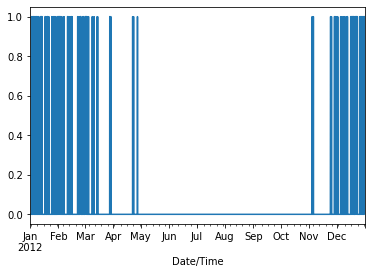

In [93]:
is_snowing.plot()

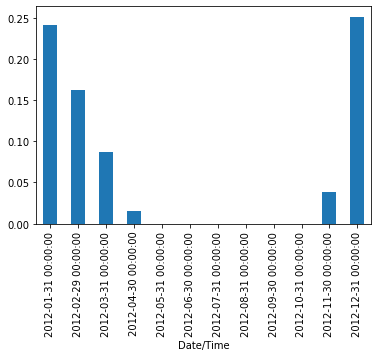

In [94]:
is_snowing.resample('M').mean().plot(kind='bar')

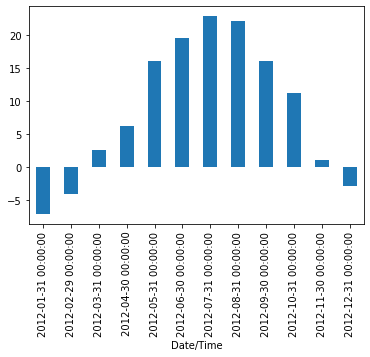

In [95]:
df["Temp (C)"].resample('M').median().plot(kind='bar')

### Combining dataframes

Used to combine different dataset based on keys

concat(list): simply add list elements (dataframes) together along an axis, the missing values will be replaced by NaN

dataframe_1.join(dataframe_2, lsuffix="", rsuffix=""): join dataframe_1 and dataframe_2 with index, if both dataframes contain a same column name, lsuffix and rsuffix will be added to column name

In [96]:
original_df = read_data()
original_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [97]:
col_type_dict = get_column_by_types(original_df)
col_type_dict

{'numerical': ['points', 'price'],
 'bool': [],
 'object': ['country',
  'description',
  'designation',
  'province',
  'region_1',
  'region_2',
  'variety',
  'winery'],
 'datetime': [],
 'category': []}

In [98]:
numerical_df = original_df[col_type_dict['numerical']]
numerical_df.head()

,points,price
0,96,235.0
1,96,110.0
2,96,90.0
3,96,65.0
4,95,66.0


In [99]:
object_df = original_df[col_type_dict['object']]
object_df.head()

,country,description,designation,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [100]:
pd.concat([numerical_df, object_df])

,points,price,country,description,designation,province,region_1,region_2,variety,winery
0,96.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
150925,NaN,NaN,Italy,Many people feel Fiano represents southern Ita...,NaN,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,NaN,NaN,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,NaN,NaN,Italy,This classic example comes from a cru vineyard...,Terre di Dora,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,NaN,NaN,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [101]:
join_df = object_df.join(numerical_df)
join_df.head()

,country,description,designation,province,region_1,region_2,variety,winery,points,price
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,96,235.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,96,110.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,96,90.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,96,65.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,95,66.0


### Drop data / add data

* dropna() will remove all lines where there is a missing value
* dropna(axis='columns') will remove all columns where there is a missing value
* dropna(how='all') will remove lines where all elements are missing
* dropna(subset=[]) check columns in list for NA

* fillna(v) will replace all NaN by this value
* fillna(method='ffill') forward fill NaN value, exists with bfill
* fillna(value=dict()) specifies what columns should get what value 

In [102]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', pd.NaT],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT, np.nan]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaT,NaN,NaT


In [103]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [104]:
df.dropna(axis='columns')

""
0
1
2
3


In [105]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [106]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [107]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [108]:
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [109]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [110]:
df.fillna(value={
    'A': 0, 'B': 1, 'C': 2, 'D': 3
})

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4
